<a href="https://colab.research.google.com/github/harichandana2004/cyberbullying_detection/blob/main/cyberbulling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data= pd.read_csv('/content/labelled_comments.csv')

In [2]:
data.head()

,label,preprocessed_comments
0,0,unsteady biden subdued trump debate analyzed
1,0,trump president future change mean bad
2,0,joe biden pls win
3,1,economy tank thanks biden harris
4,0,trump win


In [8]:
from sklearn.model_selection import train_test_split

X=data['preprocessed_comments']
y=data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set size:",X_train.shape)
print("Testing set size:",X_test.shape)

Training set size: (4400,)
Testing set size: (1100,)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)


In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)


In [10]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[459  84]
 [218 339]]
Accuracy: 0.73


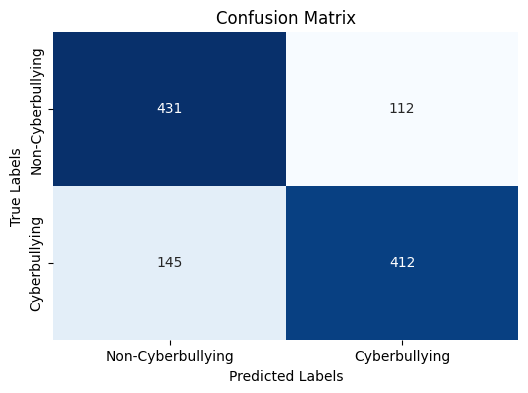

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Cyberbullying', 'Cyberbullying'],
            yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()